Principal Component Analysis (PCA) is a linear transformation that transforms data points into feature space representation. It has the following properties:

* Exactly the same dimension as the original data space
* Reconstruction of data points is optimal in the mean square error sense
* Principal components are sorted by "effectiveness" at capturing variance
* Dimensionality reduction can be done simply by truncating principal components

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import os, sys
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
datasource = "datasets/winequality-red.csv"
print(os.path.exists(datasource))

True


In [7]:
df = pd.read_csv(datasource).sample(frac = 1).reset_index(drop = True)
del df["Unnamed: 0"]

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.4,0.310,0.09,1.4,0.066,15.0,28.0,0.99459,3.42,0.70,10.0,7
1,7.2,0.835,0.00,2.0,0.166,4.0,11.0,0.99608,3.39,0.52,10.0,5
2,8.0,0.520,0.03,1.7,0.070,10.0,35.0,0.99575,3.34,0.57,10.0,5
3,10.5,0.510,0.64,2.4,0.107,6.0,15.0,0.99730,3.09,0.66,11.8,7
4,6.4,0.790,0.04,2.2,0.061,11.0,17.0,0.99588,3.53,0.65,10.4,6


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
X = np.array(df.iloc[:, :-1]) # everything except for quality

In [11]:
y = np.array(df["quality"]) # just the quality column

## Principal component analysis with sklearn
PCA transforms the data space into feature space. It is done by a matrix transform followed by truncation of low variance principal components. Then you are free to use the obtained features X_features as input to your model

In [12]:
pca = PCA(n_components = 5)

In [13]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
print(pca.explained_variance_ratio_)

[  9.46576976e-01   4.83683046e-02   2.58917183e-03   1.51896798e-03
   8.73553990e-04]


In [15]:
X_features = pca.transform(X)

In [16]:
print(X_features)

[[-18.20563238   3.21804105  -2.1326909   -0.55461504  -0.5803106 ]
 [-37.19915236  -3.80175234  -1.42647027   0.10527829  -0.7276236 ]
 [-12.4773251   -3.22618861  -0.64584673  -0.61631694  -0.37990468]
 ..., 
 [-27.98542744  -3.80268401   1.08143622   2.45836614   1.56177434]
 [ -7.57613496   4.86795097   0.71495053  -0.5606492   -1.13681316]
 [ 53.82108087   4.48179099  -1.85372144  -0.52186685  -0.33112353]]


In [17]:
print("Features Shape:\n", X_features.shape)

Features Shape:
 (1599, 5)


## Reconstruction of data space
An approximation of the original dataset can be recovered by linearly combining high variance principal components. This demonstrates the connection between data space and feature space. The difference between X_synthesized and X_reconstructed is that the former is centered at the origin because PCA assumes mathematical expectation of input to be zero and input needs to be centered otherwise. Therefore, in order to reconstruct the original dataset, the approxmiation obtained using PCA has to be shifted back.

In [18]:
print("Principal components shape:", pca.components_.shape)

Principal components shape: (5, 11)


In [19]:
X_synthesized = np.dot(X_features, pca.components_)

In [20]:
X_reconstructed = X_synthesized + np.mean(X, axis = 0)[np.newaxis, ...]

In [21]:
print("Reconstructed dataset shape:", X_reconstructed.shape)

Reconstructed dataset shape: (1599, 11)


In [22]:
# reconstructed dataset, an approximation of original dataset
pd.DataFrame(X_reconstructed, columns = df.columns[:-1])[0:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.411697,0.587801,0.082282,1.397474,0.085121,15.000681,27.999940,0.995396,3.432825,0.609004,10.012620
1,7.179677,0.587721,0.139795,2.001839,0.088623,3.999577,10.999899,0.996209,3.385262,0.604568,9.983291
2,7.983773,0.556891,0.221331,1.699344,0.089531,10.000327,34.999720,0.996562,3.324291,0.637523,9.993712
3,10.517267,0.417781,0.467575,2.401638,0.078765,5.999304,15.000333,0.997001,3.216863,0.714224,11.798766
4,6.385713,0.584453,0.089821,2.200993,0.083064,10.999779,16.999965,0.995412,3.446106,0.603986,10.393248


In [38]:
df.iloc[0:5, :-1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.4,0.310,0.09,1.4,0.066,15.0,28.0,0.99459,3.42,0.70,10.0
1,7.2,0.835,0.00,2.0,0.166,4.0,11.0,0.99608,3.39,0.52,10.0
2,8.0,0.520,0.03,1.7,0.070,10.0,35.0,0.99575,3.34,0.57,10.0
3,10.5,0.510,0.64,2.4,0.107,6.0,15.0,0.99730,3.09,0.66,11.8
4,6.4,0.790,0.04,2.2,0.061,11.0,17.0,0.99588,3.53,0.65,10.4


Compared to the original dataset

## Approximation error of principal components
As a result, we're able to represent the original dataset using principal components without losing too much information. Space consumption was essentially halved. And these principal components can be used as features for subsequent machine learning pipelines. The following calculates mean squared error between the original df and the reconstructed dataset for all the cells

In [39]:
error = X - X_reconstructed

In [40]:
np.mean((error**2))

0.0079467905725895491

## Verify the eigenstructure of PCA

The solution of PCA could be found by performing eigen-decomposition of the covariance matrix of X. This section quickly verifies some of its properties pertaining to the eigenstructure. 

Some other interesting facts about PCA include:
* The error and approximation are othogonal. Because approximation consists of high variance principal components while the error solely consists of low variance principal components, and all principal components are othogonal pairwise. 

## Scree plot
This plots variance (y axis) against components (x axis). As one moves to the right, toward later components, the variances (or the eigenvalues) drop. It helps us decide on the number of principal components to be retained.

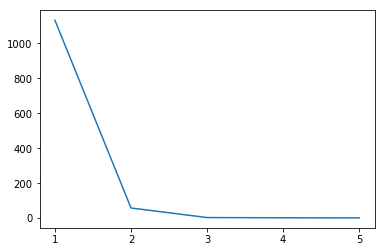

In [42]:
x_ticks = np.arange(len(pca.components_)) + 1
plt.xticks(x_ticks) # this enforces integers on the x axis
plt.plot(x_ticks, pca.explained_variance_)

You can also plot the explained variance ratio. A full PCA without components truncated would have total explained variance ratio equal to 1.

Total Explained Variance Ratio
 0.999926974773


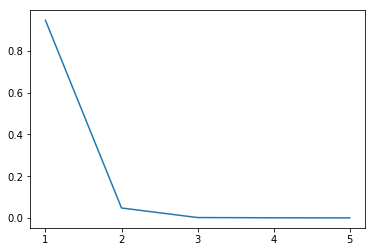

In [43]:
plt.xticks(x_ticks)
plt.plot(x_ticks, pca.explained_variance_ratio_)
print("Total Explained Variance Ratio\n", np.sum(pca.explained_variance_ratio_))